In [1]:
import yfinance as yf
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
btc_ticker = yf.Ticker("BTC-USD")
btc = btc_ticker.history(period="max")
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-09 00:00:00+00:00,61191.199219,63404.914062,60648.074219,63049.960938,25453338161,0.0,0.0
2024-05-10 00:00:00+00:00,63055.191406,63446.742188,60208.781250,60792.777344,27804954694,0.0,0.0
2024-05-11 00:00:00+00:00,60793.355469,61451.152344,60492.625000,60793.710938,13842272968,0.0,0.0


In [3]:
btc.index = pd.to_datetime(btc.index)

In [4]:
del btc["Dividends"]
del btc["Stock Splits"]

In [5]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

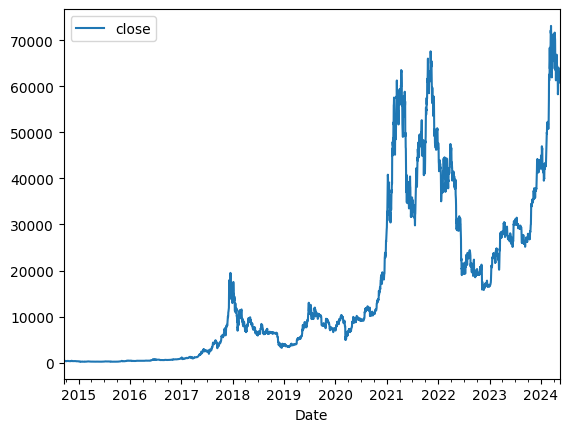

In [6]:
btc.plot.line(y="close", use_index=True)

In [7]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-05-09,0.566667,-0.129409,0.183333
2024-05-10,0.566667,-0.129409,0.183333
2024-05-11,0.500000,-0.101909,0.150000
2024-05-12,0.500000,-0.101909,0.150000


In [13]:
wiki = wiki.tz_localize('UTC')
btc = btc.merge(wiki, left_index=True, right_index=True)

In [14]:
btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)
btc["target"].value_counts()

target
1    1870
0    1657
Name: count, dtype: int64

In [15]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-09 00:00:00+00:00,61191.199219,63404.914062,60648.074219,63049.960938,25453338161,0.566667,-0.129409,0.183333,60792.777344,0
2024-05-10 00:00:00+00:00,63055.191406,63446.742188,60208.781250,60792.777344,27804954694,0.566667,-0.129409,0.183333,60793.710938,1
2024-05-11 00:00:00+00:00,60793.355469,61451.152344,60492.625000,60793.710938,13842272968,0.500000,-0.101909,0.150000,61448.394531,1
2024-05-12 00:00:00+00:00,60793.503906,61818.156250,60632.601562,61448.394531,13800459405,0.500000,-0.101909,0.150000,62915.937500,1


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4642857142857143

In [18]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [19]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [20]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [21]:
predictions["predictions"].value_counts()

predictions
1    1379
0    1053
Name: count, dtype: int64

In [22]:
precision_score(predictions["target"], predictions["predictions"])

0.504713560551124

In [23]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [24]:
btc, new_predictors = compute_rolling(btc.copy())
predictions = backtest(btc, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5271929824561403

In [25]:
predictions

,target,predictions
2017-09-16 00:00:00+00:00,0,0
2017-09-17 00:00:00+00:00,1,1
2017-09-18 00:00:00+00:00,0,0
2017-09-19 00:00:00+00:00,0,1
2017-09-20 00:00:00+00:00,0,1
...,...,...
2024-05-09 00:00:00+00:00,0,0
2024-05-10 00:00:00+00:00,1,1
2024-05-11 00:00:00+00:00,1,1
2024-05-12 00:00:00+00:00,1,0


In [30]:
predictions.to_csv("btc.csv")